In [35]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [36]:
def load_stock_data(symbol, start_date, end_date):
    data = fdr.DataReader(symbol, '2024')
    return data.loc[start_date:end_date]

In [37]:
def add_rate_of_change_columns(stock_data, periods_list=[1, 5, 10]):
    for period in periods_list:
        shifted_col_name = f'{period}-Day Close'
        roc_col_name = f'{period}-Day'
        stock_data[shifted_col_name] = stock_data['Close'].shift(periods=period)
        stock_data[roc_col_name] = (
            (stock_data['Close'] - stock_data[shifted_col_name]) / stock_data[shifted_col_name] * 100
        )

In [38]:
def plot_kospi_vs_stock(kospi, stock, stock_name, periods_list=[1, 5, 10]):
    plt.figure(figsize=(12, 8))

    for i, period in enumerate(periods_list, start=1):
        plt.subplot(len(periods_list), 1, i)
        plt.plot(kospi.index, kospi[f'{period}-Day'], label='KOSPI', linestyle='-', color='blue')
        plt.plot(stock.index, stock[f'{period}-Day'], label=stock_name, linestyle='--', color='red')
        plt.title(f'{period}-Day Rate of Change: KOSPI vs {stock_name}')
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()
    #

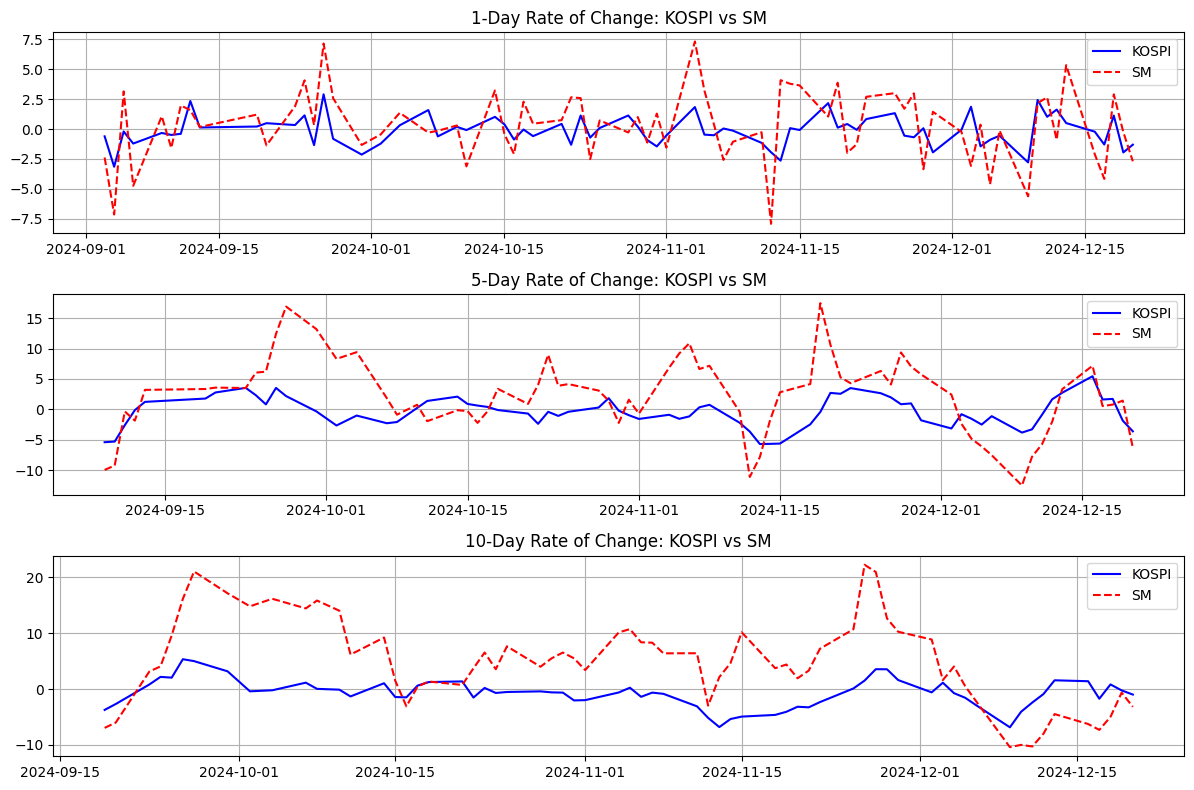

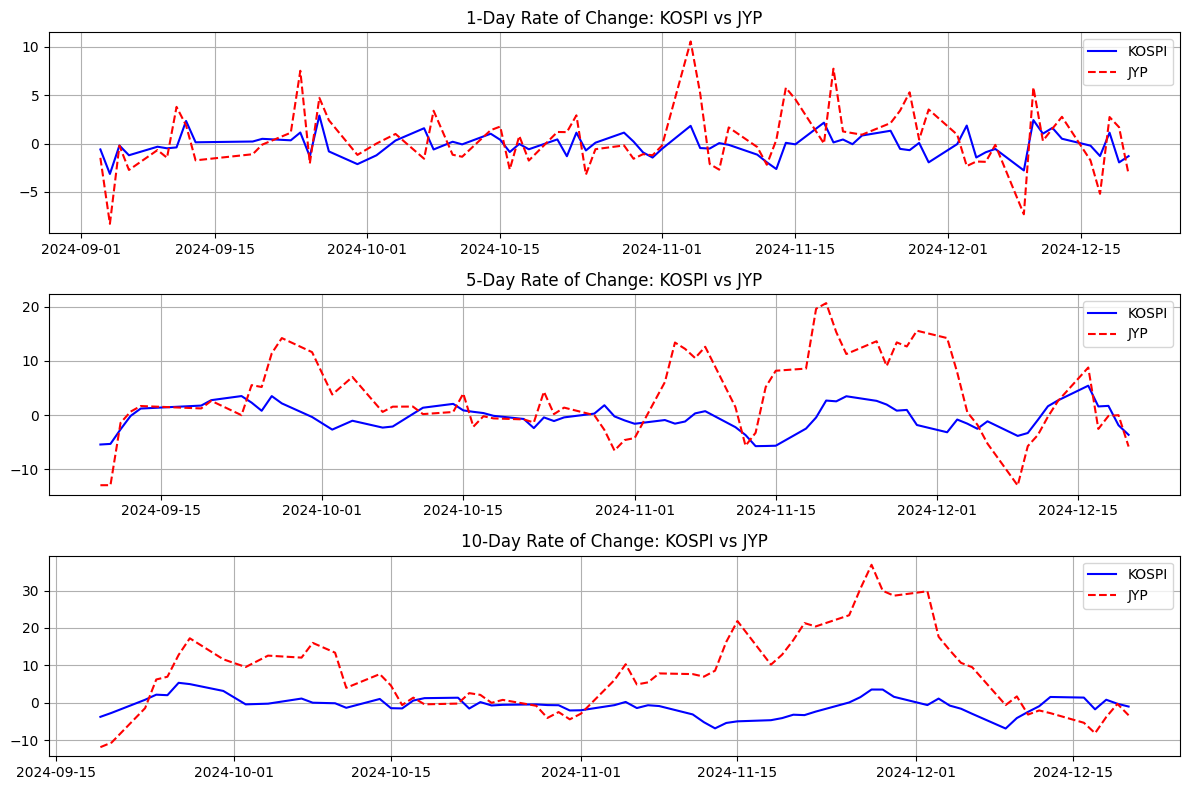

In [39]:
start_date = '2024-09-01'
end_date = '2024-12-31'

# 주식 데이터 로드
kospi = load_stock_data('KS11', start_date, end_date)
sm_ent = load_stock_data('041510', start_date, end_date)
jyp_ent = load_stock_data('035900', start_date, end_date)

# 등락률 열 추가
add_rate_of_change_columns(kospi)
add_rate_of_change_columns(sm_ent)
add_rate_of_change_columns(jyp_ent)

# 그래프 출력: KOSPI vs SM
plot_kospi_vs_stock(kospi, sm_ent, 'SM')

# 그래프 출력: KOSPI vs JYP
plot_kospi_vs_stock(kospi, jyp_ent, 'JYP')